# 2. Test Model Notebook

Con este código puede probar el resultado del modelo desplegado

## Declaraciones

In [1]:
import sagemaker
import numpy as np
from tensorflow.python.keras.preprocessing.image import load_img
from sagemaker.predictor import json_deserializer, json_serializer
from PIL import Image

## Parámetros de entrada

El único parámetro necesario es el nombre del endpoint donde está desplegado el modelo

In [2]:
endpoint = 'dog-cat-classifier2021-04-16-13-30-21'

## Test

El resto del código lo que hace es escojer al azar un conjunto de 5 fotos del juego de validación y consultar al modelo si es un perro o un gato

The class RealTimePredictor has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
content_type is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
accept is a no-op in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


dog


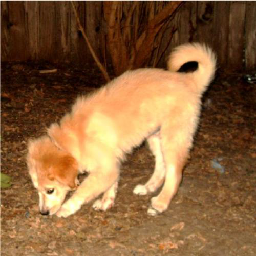

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


dog


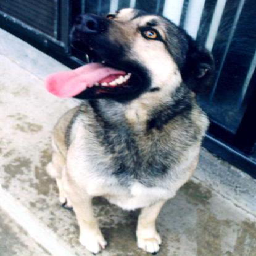

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


dog


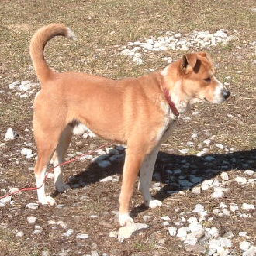

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


dog


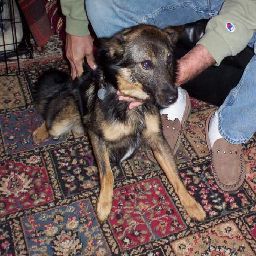

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Cat


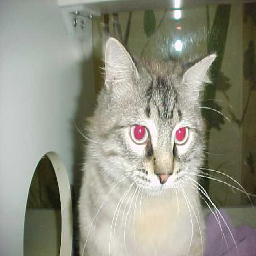

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Cat


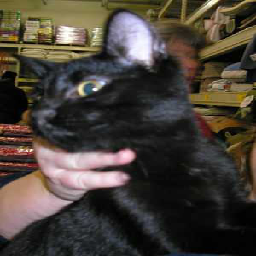

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Cat


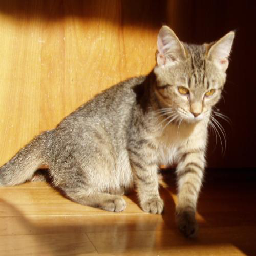

The json_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Cat


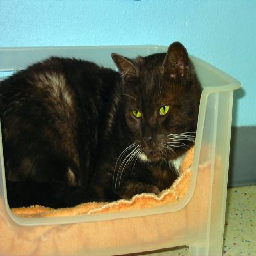

In [12]:
predictor = sagemaker.predictor.RealTimePredictor(
    endpoint_name=endpoint,
    serializer=json_serializer,
    deserializer=json_deserializer,
    content_type='application/json',
    accept='application/json',)

archivos = ['4808.jpg','4809.jpg','4820.jpg','4821.jpg', '9718.jpg','9724.jpg','9726.jpg','9727.jpg']

for archivo in archivos:
    
        image = load_img("test_images/" + archivo, target_size=(256, 256))
        image_array = np.array(image).reshape((1, 256, 256, 3))
        

        predictions = predictor.predict(image_array)['predictions'] #returns a list of lists
        print("dog" if predictions[0][0]>0 else "Cat")
        
        #show image
        image_resized = Image.fromarray(image_array[0])
        display(image_resized)
        
        #result = predictor.predict({'inputs_input': image_array})
        #pdog=float(result['outputs']['dense_2']['floatVal'][1])
        #pcat=float(result['outputs']['dense_2']['floatVal'][0])
        #if(pdog>pcat): 
        #    print('dog!! ' + str(round(pdog,2)))
        #else:
        #    print('cat!!'  + str(round(pcat,2)))